In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns

In [29]:
data=pd.read_excel("Book121.xlsx","Sheet1")

In [30]:
data

,Year,E,GDP,I,RI,EE,P
0,1987,NaN,125935,-4.664786,12.91,NaN,43.329231
1,1988,NaN,126867,6.873009,2.81,NaN,44.757203
2,1989,NaN,132336,11.051959,0.39,NaN,46.272299
3,1990,848.0,128347,5.004794,2.64,24.52,47.887865
4,1991,3038.0,125406,44.996348,-10.99,79.37,49.609969
5,1992,224.0,139411,2.052897,-6.52,74.64,51.423585
6,1993,3387.0,139480,4.714303,0.55,236.27,53.295566
7,1994,2370.0,147454,6.293459,11.08,176.93,55.180998
8,1995,4500.0,162373,14.835348,2.11,382.73,57.047908
9,1996,2500.0,169246,-8.998745,13.64,209.58,58.883530


### Data cleaning

In [31]:
data.fillna(value=0,inplace=True)

In [32]:
data.head()

,Year,E,GDP,I,RI,EE,P
0,1987,0.0,125935,-4.664786,12.91,0.00,43.329231
1,1988,0.0,126867,6.873009,2.81,0.00,44.757203
2,1989,0.0,132336,11.051959,0.39,0.00,46.272299
3,1990,848.0,128347,5.004794,2.64,24.52,47.887865
4,1991,3038.0,125406,44.996348,-10.99,79.37,49.609969


In [33]:
lm=LinearRegression()
x=data[["Year","GDP","I","RI","EE","P"]]
y=data["E"]

lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
e0=lm.intercept_
e=lm.coef_

print("\nEhat={:.3f}Year{:.3f}GDP+{:.3f}I{:.3f}RI{:.3f}EE+{:.3f}P+{:.3f}".format(e[0],e[1],e[2],e[3],e[4],e[5],e0))


Ehat=-2586.428Year-0.006GDP+7.048I-1.211RI-0.004EE+1523.812P+5075912.933


### Multicollinearity test

In [57]:
VIF=pd.DataFrame(columns=["Features","VIF Value"])

In [58]:
VIF["Features"]=x.columns
VIF["VIF Value"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]

In [59]:
VIF

,Features,VIF Value
0,Year,36.005276
1,GDP,7.804217
2,I,5.241419
3,RI,3.717869
4,EE,2.167278
5,P,50.699812


### Hetroscedasticity test

In [119]:
prediction=lm.predict(x)
residue=(prediction-np.mean(prediction))

In [120]:
residue

array([-2925.68373318, -3248.41414731, -3527.83668455, -3673.01175192,
       -3318.77528195, -3536.98442957, -3261.70138579, -3026.19952902,
       -2790.53470805, -2803.97202377, -2569.235772  , -2444.15429011,
       -2198.94762858, -2054.41705139, -1822.39535461, -1288.1786047 ,
        -773.00682319,  -498.98531755,    10.88989333,   487.72786342,
        1048.81926482,  1957.08168097,  2248.18489949,  3002.93966899,
        4201.80403816,  5085.00473653,  6085.09748453,  7228.01893296,
        4125.11770503,  4561.13691472,  5720.6114343 ])

<IPython.core.display.Javascript object>


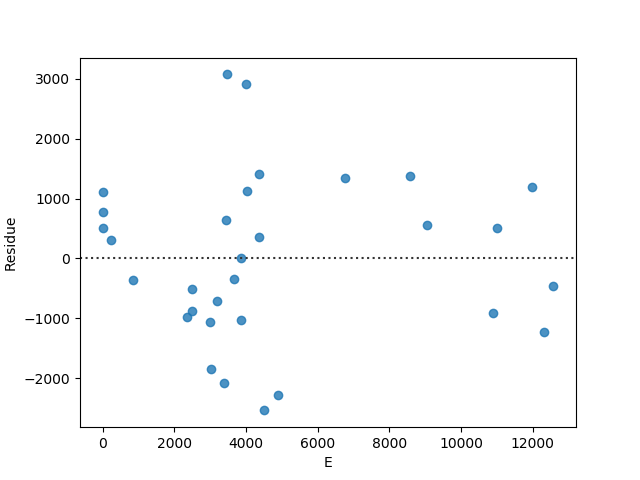

[Text(0.5, 0, 'E'), Text(0, 0.5, 'Residue')]

In [122]:
ax=sns.residplot(y,residue)
ax.set(xlabel="E",Ylabel="Residue")

In [66]:
from statsmodels.stats.diagnostic import het_white

In [125]:
test=het_white(residue,x)
print("Lagrange multiplier statistics={}\nLM test's p-value={}\nf-statistic={}\nF-test's p-value={}"
      .format(test[0],test[1],test[2],test[3]))

Lagrange multiplier statistics=30.97086801345467
LM test's p-value=0.05557622265245218
f-statistic=531.5612096220011
F-test's p-value=1.4569486611116165e-12


### Normality test

In [75]:
 from scipy import stats

In [80]:
N,p=stats.normaltest(x.values)

In [106]:
Normal=pd.DataFrame(index=x.columns,columns=["statistic","P-value"])

In [108]:
Normal["statistic"]=N
Normal["P-value"]=p
Normal

,statistic,P-value
Year,6.777138,3.375695e-02
GDP,25.942755,2.325961e-06
I,19.242329,6.631034e-05
RI,6.812552,3.316447e-02
EE,66.610681,3.433004e-15
P,4.455004,1.077974e-01


### RVf plot

<IPython.core.display.Javascript object>


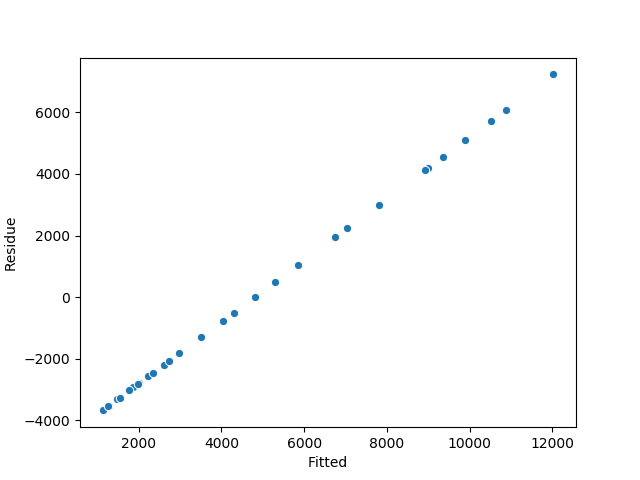

[Text(0, 0.5, 'Residue'), Text(0.5, 0, 'Fitted')]

In [123]:
ax=sns.scatterplot(lm.predict(x),residue)
ax.set(xlabel="Fitted",ylabel="Residue")